In [2]:
# 1. Download data.zip from the celebrity faces dataset from kaggle at 
# https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset/data

# Important OpenCV face detection and classification links
# https://realpython.com/blog/python/face-recognition-with-python/
# https://www.superdatascience.com/opencv-face-detection/
# https://www.superdatascience.com/opencv-face-recognition/

In [6]:
#Load all necessary libraries
import numpy as np
import cv2 # opencv
import os # control and access the directory structure in local machine
from matplotlib import pyplot as plt

In [10]:
os.chdir('C:/Users/rithanya/Documents/Python/faces/') #folder where I unzipped data.zip

#OpenCV cascades (xml files) are typically stored at this location
#C:\Users\<user>\Miniconda3\Library\etc\haarcascades
haarcascades_path = os.listdir('C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/')
frontface_alt_cascade = 'C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt.xml'
frontface_default_cascade = 'C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_default.xml'
frontface_alt2_cascade = 'C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt2.xml'
frontface_alt_tree_cascade = 'C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt2.xml'


In [8]:
#utility function to apply differenct cascade function on the images at difference scaleFactor
def detect(faceCascade, gray_,  scaleFactor_ = 1.1):
    faces = faceCascade.detectMultiScale(
                    gray_,
                    scaleFactor= scaleFactor_,
                    minNeighbors=5,
                    minSize=(30, 30),
                    flags = cv2.CASCADE_SCALE_IMAGE
                )
    return faces

train/ben_afflek/httpcsvkmeuaeccjpg.jpg


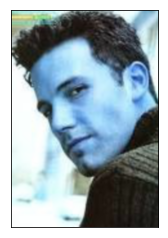

train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg


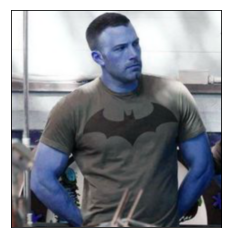

train/elton_john/httpssmediacacheakpinimgcomxfecfecaefaadfebejpg.jpg


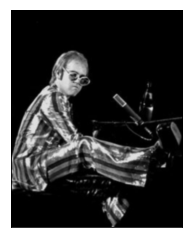

train/elton_john/httpwwwjohnpauljonesarenacomeventimagesEltonCalendarVjpg.jpg


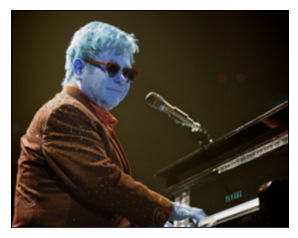

train/madonna/httpssmediacacheakpinimgcomxafafedebcbjpg.jpg


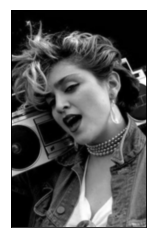

train/madonna/httpssmediacacheakpinimgcomxfeebfdccajpg.jpg


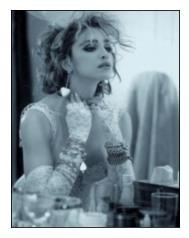

train/madonna/httpssmediacacheakpinimgcomxffeabacaaejpg.jpg


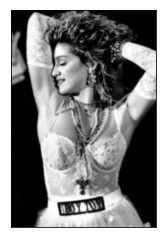

train/madonna/httpuploadwikimediaorgwikipediacommonsthumbaMadonnaRotterdamjpgpxMadonnaRotterdamjpg.jpg


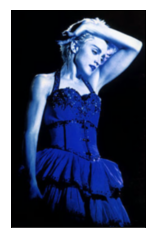

train/mindy_kaling/httpssmediacacheakpinimgcomxeedccadejpg.jpg


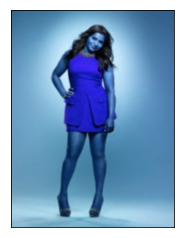

9


In [11]:
# code that iterates thru the images in the celebrityfaces dataset and detects faces. Finally it
# ... only displays those images that it can't detect the faces.
faceCascade_default = cv2.CascadeClassifier(frontface_default_cascade)
faceCascade_alt = cv2.CascadeClassifier(frontface_alt_cascade)
faceCascade_alt2 = cv2.CascadeClassifier(frontface_alt2_cascade)
faceCascade_alt_tree = cv2.CascadeClassifier(frontface_alt_tree_cascade)
i = 0
for imgfolder in os.listdir('train/'): #iterate thru each of the 5 celeb folders
    if(imgfolder != '.DS_Store'):
        for filename in os.listdir('train/' + imgfolder):# iterate thru each image in a celeb folder
            filename = 'train/' + imgfolder + '/' + filename # build the path to the image file
            if(filename.endswith('.jpg')):
                #print(filename) # print the filename read. For debugging purpose only
                img = cv2.imread(filename) # read the image using OpenCV
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = detect(faceCascade_default, gray, 1.1)
                if (len(faces)!=1):
                    faces = detect(faceCascade_default, gray, 1.2)
                    if(len(faces) != 1):
                        faces = detect(faceCascade_alt2,gray, 1.1)
                        if(len(faces) != 1):
                            faces = detect(faceCascade_alt2,gray, 1.2)
                            if(len(faces) != 1):
                                faces = detect(faceCascade_alt, gray, 1.1)
                                if(len(faces) != 1):
                                    faces = detect(faceCascade_alt, gray, 1.2)
                                    if(len(faces) != 1):
                                        faces = detect(faceCascade_alt_tree, gray, 1.1)
                                        if(len(faces) != 1):
                                            faces = detect(faceCascade_alt_tree, gray, 1.2)
                                            if(len(faces) != 1):
                                                for (x, y, w, h) in faces:
                                                    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
                                                plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') # display all images read
                                                print(filename) # print the filename read. For debugging purpose only
                                                plt.xticks([]), plt.yticks([])
                                                plt.show()
                                                i = i + 1
print(i)

In [ ]:
# TODO 
# 1. use the LBP cascade files to detect faces. How many faces can this detect. How much faster is
#     ... it compared to Haar. 
# 2. We need to crop the faces from detected images and save them. This can be used as training data
#     ... set for the next phase recognizer
# 3. Review the SuperDataScience.com articles on Face recognition and apply different OpenCV face
#    ... recognizers (Eigenfaces, FisherFaces, LBPH etc.,) on this dataset. See what works better
# 4. Learn how to draw the label of the recognized faces using OpenCV (just above the rectangle)
# 5. Learn how to extract frames from a video file and run this pipleline to detect and recognize faces
